In [1]:
import ISRAnalysis as an

Welcome to JupyROOT 6.14/04


In [2]:
binDef = "_FineCoarse"
detUnfold_muon_2016 = an.ISRAnalysis("2016", "electron", False, "matrix", \
                                     "Detector_Dressed_DR4PI_Fiducial", "Detector_Dressed_DR4PI", binDef)

ISRUnfold set!
ISRUnfold::setNomResMatrix set response matrix...
Rec_binName: Detector_Dressed_DR4PI_Fiducial/Pt_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Rec_Pt
Gen_binName: Detector_Dressed_DR4PI_Fiducial/Pt_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Gen_Pt
ISRUnfold::setMassBindEdges 
0 th mass bin edge: 50
1 th mass bin edge: 64
2 th mass bin edge: 81
3 th mass bin edge: 101
4 th mass bin edge: 200
5 th mass bin edge: 320
ISRUnfold::setNomResMatrix set response matrix...
Rec_binName: Detector_Dressed_DR4PI_Fiducial/Mass_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Rec_Mass
Gen_binName: Detector_Dressed_DR4PI_Fiducial/Mass_ResMatrix_Detector_Dressed_DR4PI_FineCoarse/Gen_Mass
ISRUnfold::setMassBindEdges 
ISRUnfold::setMassBindEdges massBinEdges already set.


Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 126 input bins and 70 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #71
Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 72 input bins and 72 output bins
Warning in <TUnfoldV17::TUnfold>: too few (ny=72) input bins for nx=72 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #73


In [3]:
sigma = detUnfold_muon_2016.checkMatrixCond()

Decompose(), successed? 1
Mass, Cond(): 8.5134

In [4]:
#sigma.Print()

In [5]:
detUnfold_muon_2016.checkMatrixCond("Pt")

<ROOT.TVectorT<double> object ("TVectorT<double>") at 0x6e35988>

Decompose(), successed? 1
Pt, Cond(): 5.91405

In [6]:
# Nominal
detUnfold_muon_2016.setInputHist(False, False, None, "Detector")
detUnfold_muon_2016.setUnfoldBkgs(False, "Detector")

In [7]:
#systematics = {"ID":["IdSFUp", "IdSFDown"], "ISO":["IsoSFUp", "IsoSFDown"], "TRG":["trgSFUp", "trgSFDown"], \
#              "PU":["PUUp", "PUDown"], "Scale":["ScaleABUp", "ScaleABDown"], "AlphaS":["AlphaSUp", "AlphaSDown"]}
#              #"Fake":["FakeUp", "FakeDown"]}
    
systematics = {"ID":["IdSFUp", "IdSFDown"], "TRG":["trgSFUp", "trgSFDown"], \
              "PU":["PUUp", "PUDown"], "Scale":["ScaleABUp", "ScaleABDown"], "AlphaS":["AlphaSUp", "AlphaSDown"]}

for sysName, postfixs in systematics.items():
    for postfix in postfixs:
        detUnfold_muon_2016.setSystematics(sysName, postfix)


Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 126 input bins and 70 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #71
Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 72 input bins and 72 output bins
Warning in <TUnfoldV17::TUnfold>: too few (ny=72) input bins for nx=72 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #73
Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 126 input bins and 70 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding 

In [8]:
for sysName, postfixs in systematics.items():
    for postfix in postfixs:
        print(sysName + " " + postfix)
        detUnfold_muon_2016.setInputHist(False, False, None, "Detector", True, sysName, postfix)
        detUnfold_muon_2016.setUnfoldBkgs(True, "Detector", sysName, postfix)

        detUnfold_muon_2016.subFake(True, sysName,postfix)


ID IdSFUp
ID IdSFDown
TRG trgSFUp
TRG trgSFDown
PU PUUp
PU PUDown
Scale ScaleABUp
Scale ScaleABDown
AlphaS AlphaSUp
AlphaS AlphaSDown


In [9]:
detUnfold_muon_2016.subFake() # Subract DY fake (out of fiducial volume at gen level)

ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)


Info in <TCanvas::Print>: png file DiPt_M0.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: detector_level_Pt_FineCoarse
Info in <TCanvas::Print>: png file DiPt_M1.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: detector_level_Pt_FineCoarse
Info in <TCanvas::Print>: png file DiPt_M2.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: detector_level_Pt_FineCoarse
Info in <TCanvas::Print>: png file DiPt_M3.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: detector_level_Pt_FineCoarse
Info in <TCanvas::Print>: png file DiPt_M4.png has been created


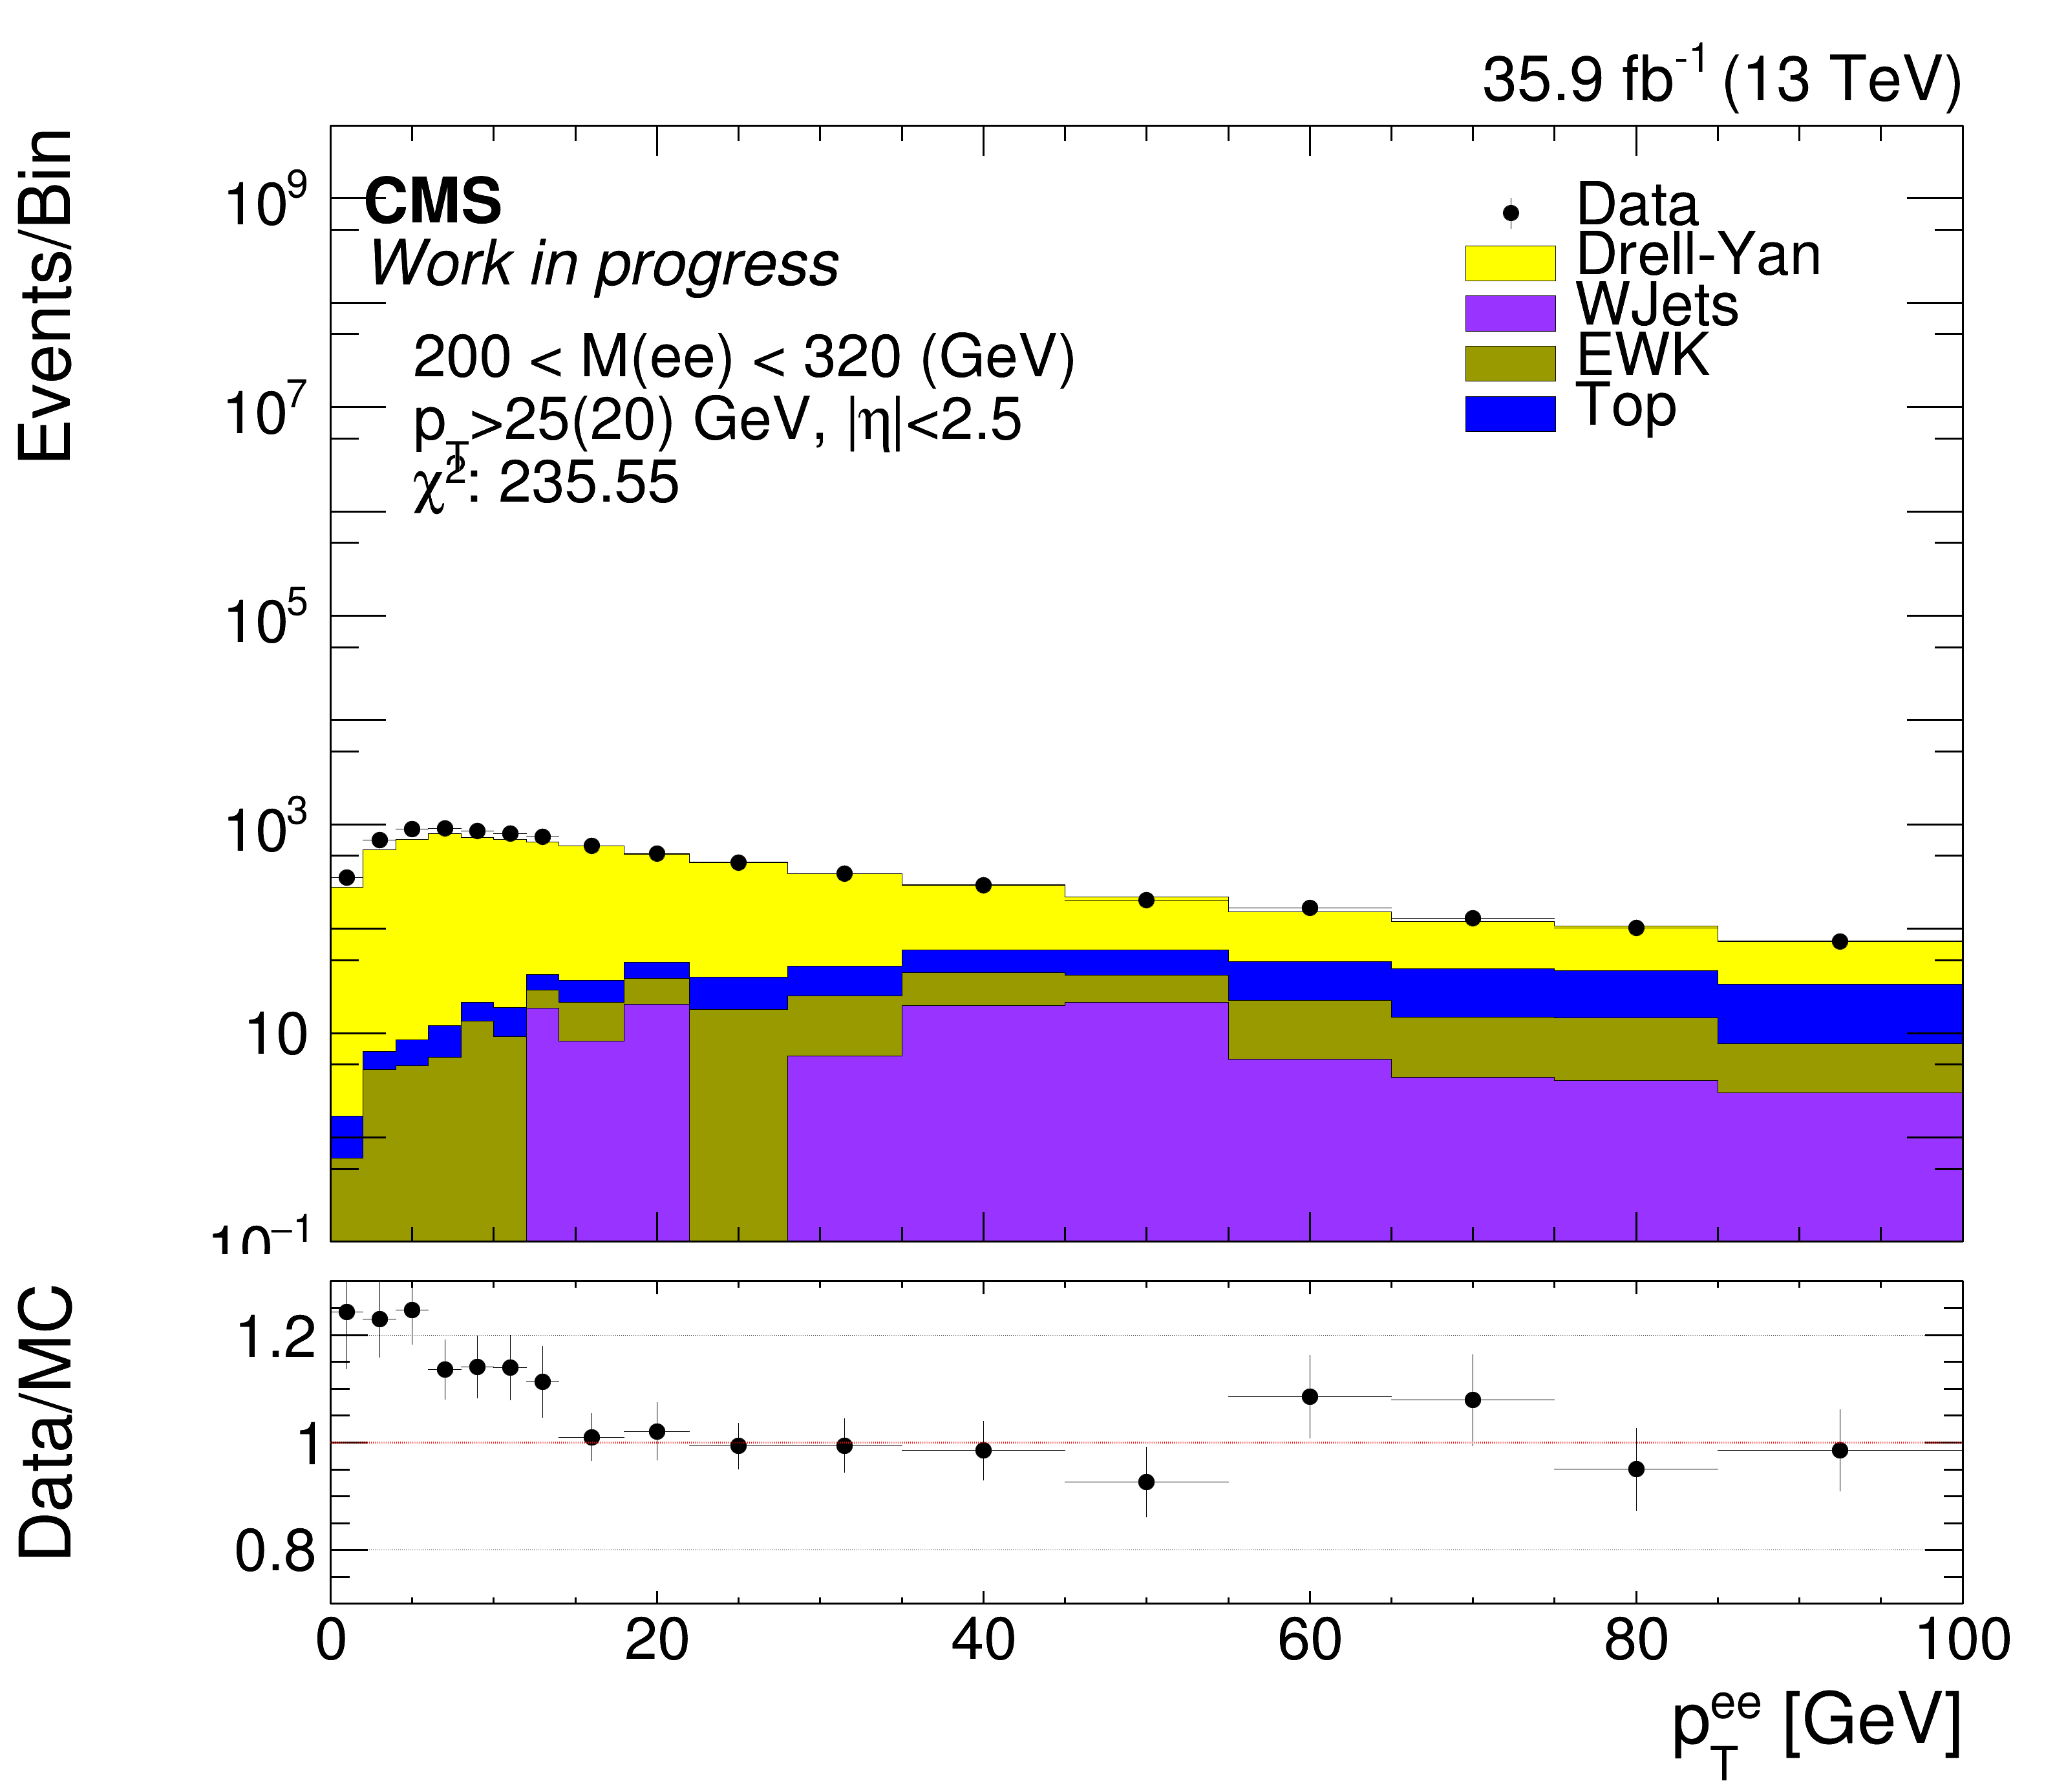

In [10]:
# 
for massBin in range(5):
    detUnfold_muon_2016.drawDetPlot("Pt"+binDef, "Detector", "pt[UO];mass[UOC"+str(massBin)+"]", True, "", "DiPt_M"+str(massBin), massBin, True)

ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)


Info in <TCanvas::Print>: png file detector_Mass_FineCoarse.png has been created


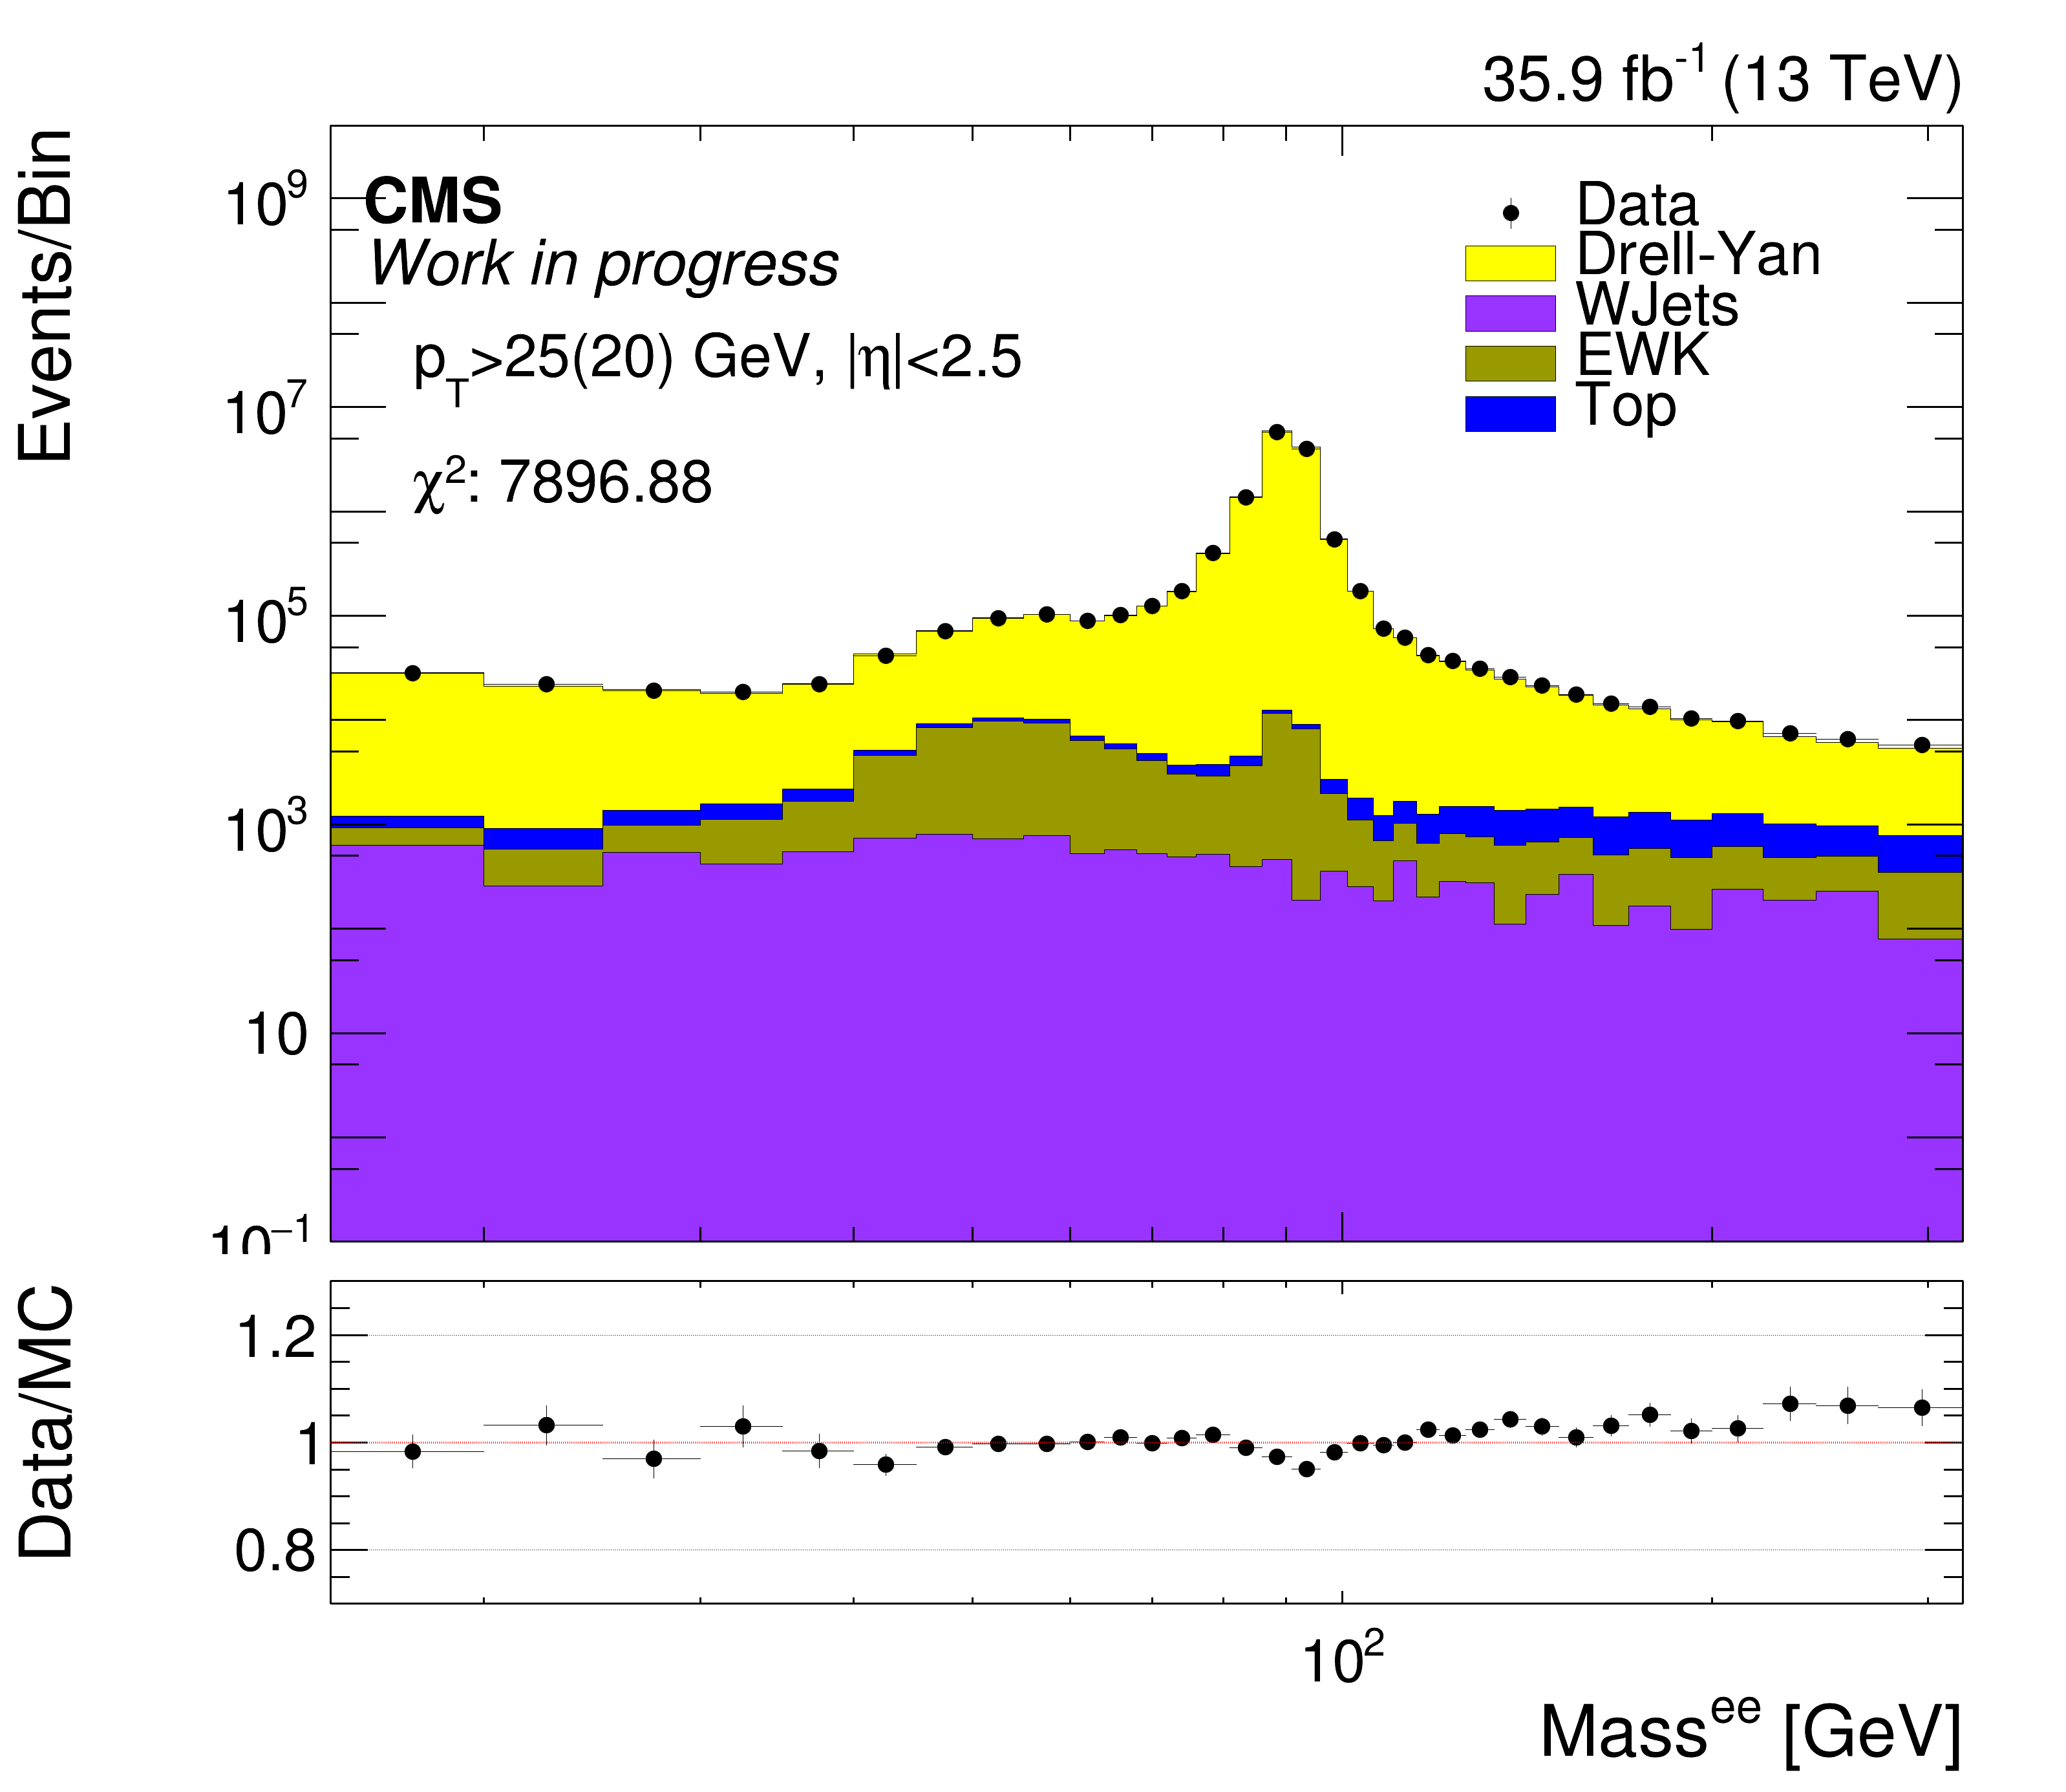

In [11]:
detUnfold_muon_2016.drawDetPlot("Mass"+binDef, "Detector", "mass[UO];pt[UOC0]", True, "")

In [12]:
#for massBin in range(0,5):
#    detUnfold_muon_2016.drawDetPlot("Pt_1D", "Detector_M_"+str(massBin), "", True, "AlphaS", "DiPt_M"+str(massBin)+"1GeVBin", massBin)

In [13]:
detUnfold_muon_2016.doUnfold()

Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed


In [14]:
detUnfold_muon_2016.doUnfold(True)

Do systematic unfold!
Unfold for AlphaS systematic.
2 systematic variation exist.
posfix: AlphaSUp
posfix: AlphaSDown
Unfold for ID systematic.
2 systematic variation exist.
posfix: IdSFUp
posfix: IdSFDown
Unfold for PU systematic.
2 systematic variation exist.
posfix: PUUp
posfix: PUDown
Unfold for Scale systematic.
2 systematic variation exist.
posfix: ScaleABUp
posfix: ScaleABDown
Unfold for TRG systematic.
2 systematic variation exist.
posfix: trgSFUp
posfix: trgSFDown


Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: 

ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
chi^{2}, 4484.46


Info in <TCanvas::Print>: png file unfolded_Mass.png has been created


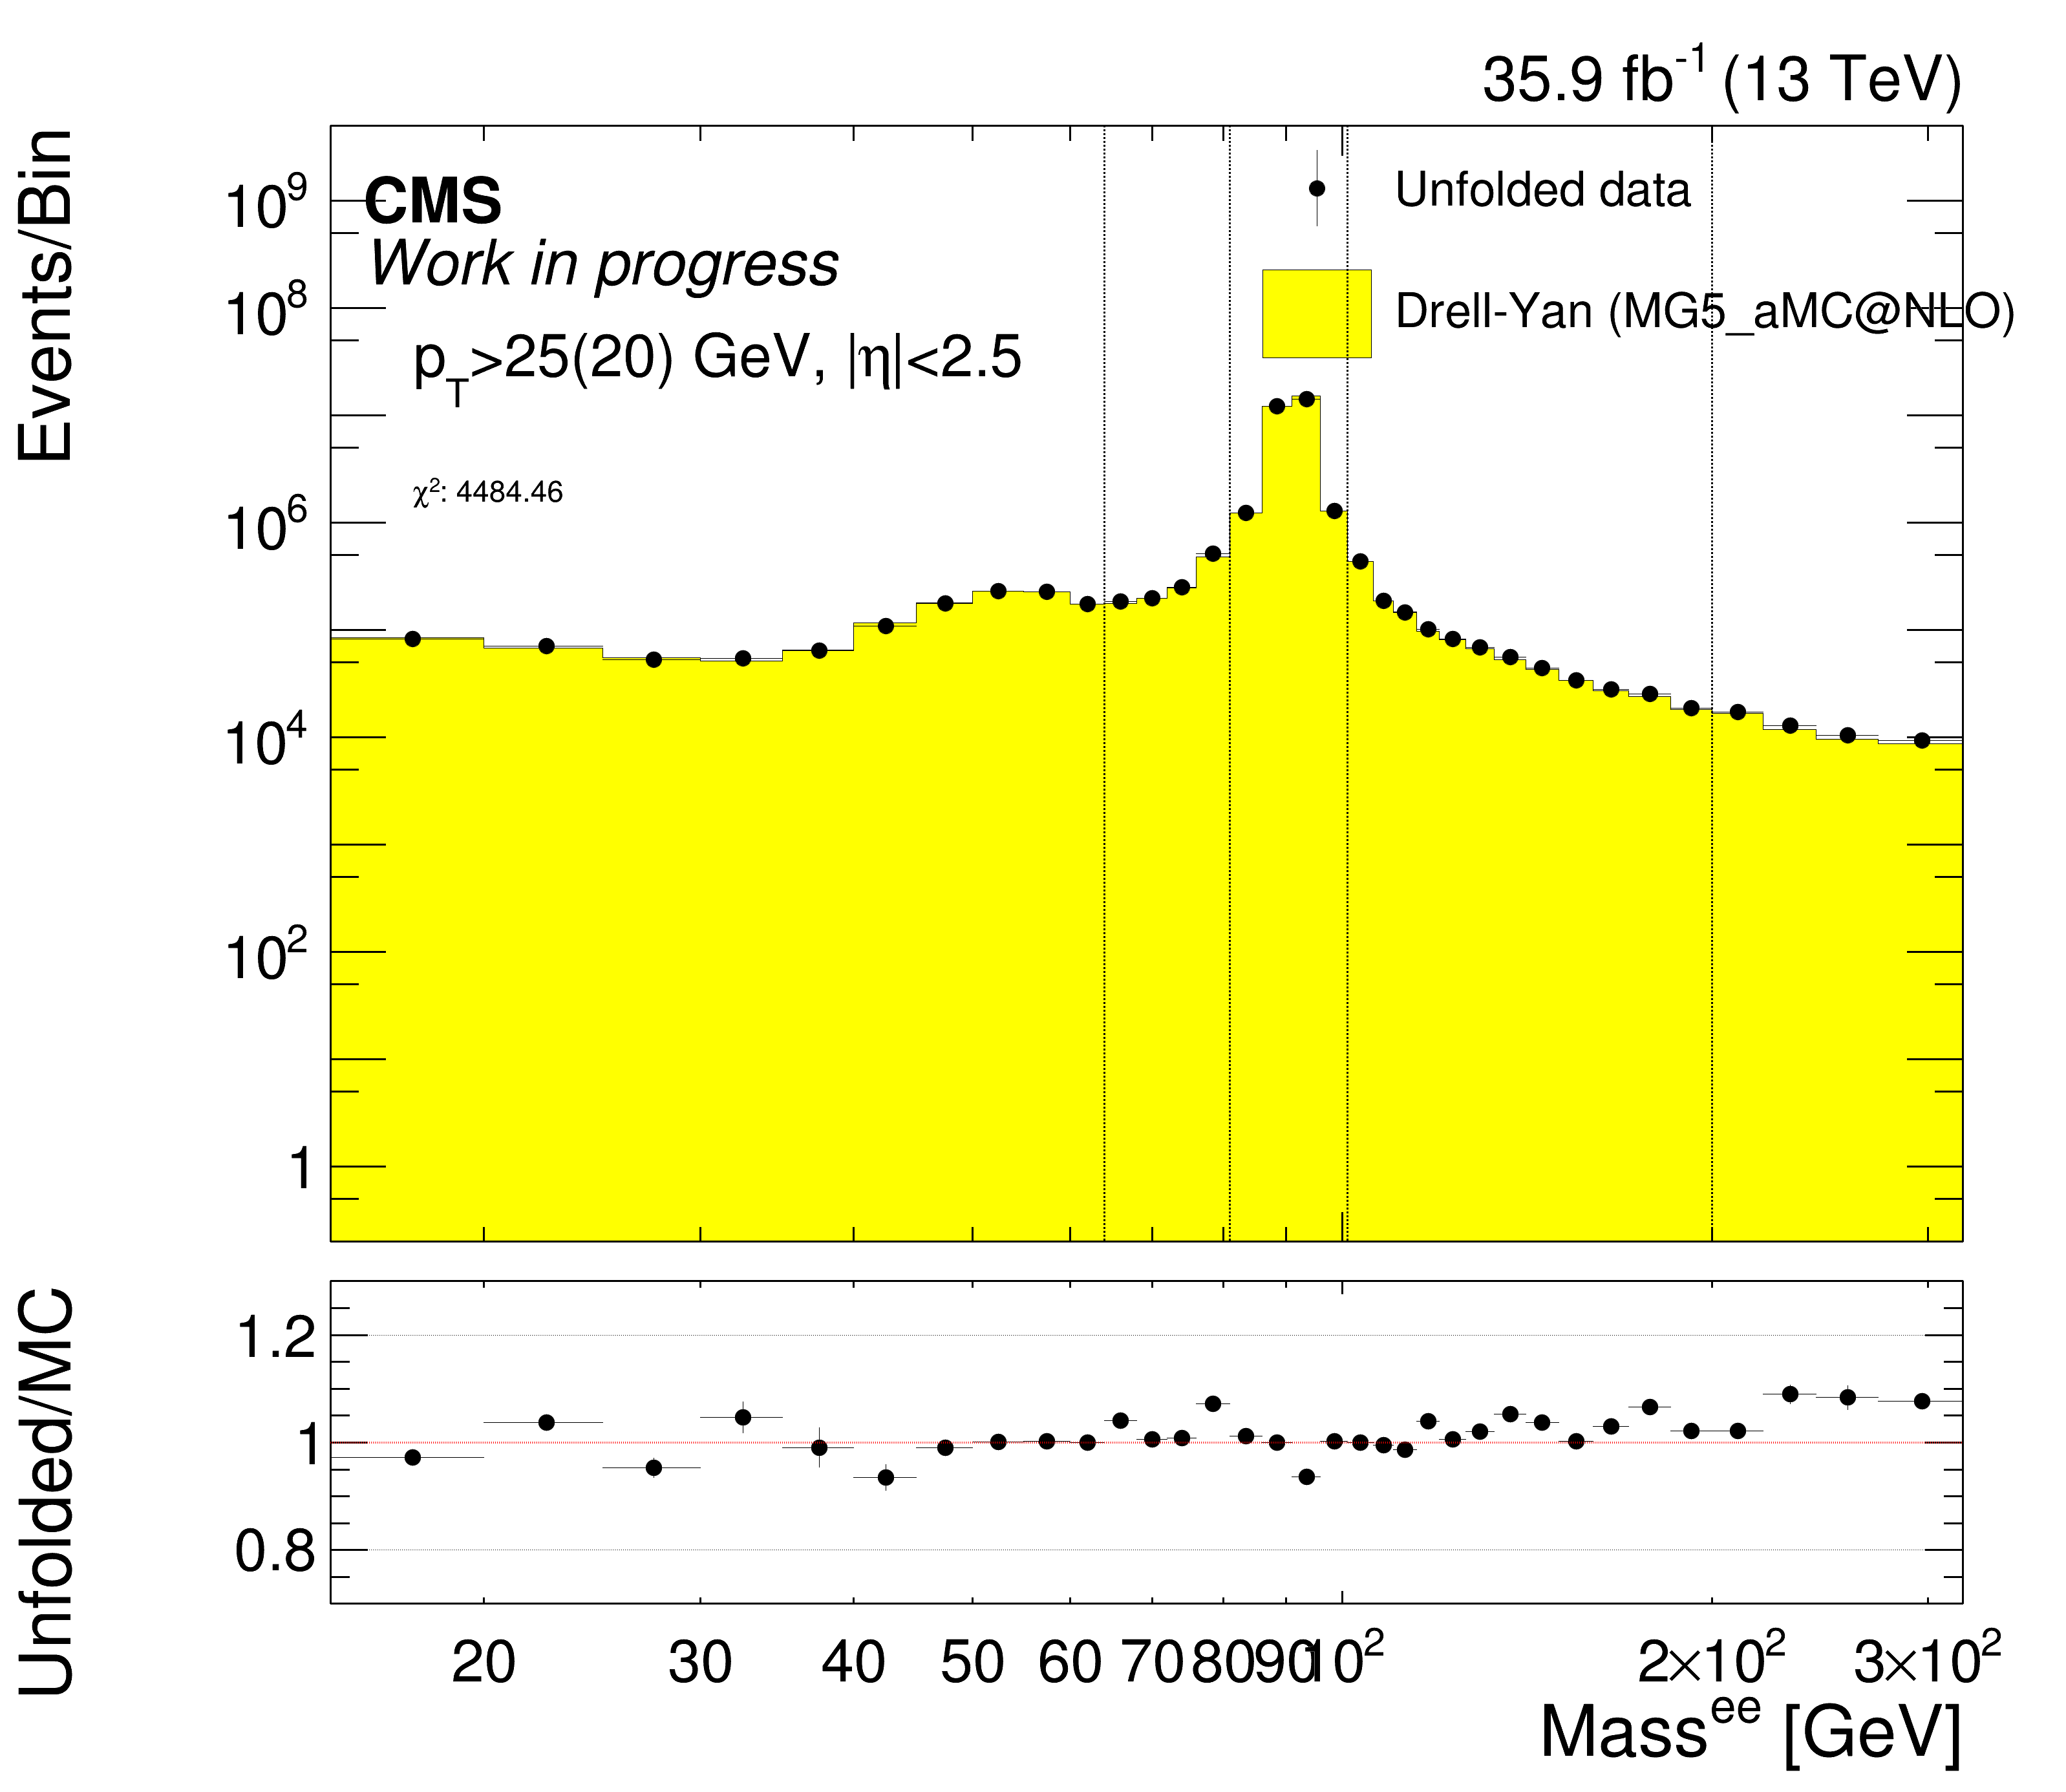

In [15]:
detUnfold_muon_2016.drawUnfPlot("Mass", "mass[UO];pt[UOC0]", True, "")

ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
chi^{2}, 224.929
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
chi^{2}, 708.118
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
chi^{2}, 37355
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
chi^{2}, 823.744
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
chi^{2}, 83.0863


Info in <TCanvas::Print>: png file UnfDiPt_M0.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: unfolded_level_Pt
Info in <TCanvas::Print>: png file UnfDiPt_M1.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: unfolded_level_Pt
Info in <TCanvas::Print>: png file UnfDiPt_M2.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: unfolded_level_Pt
Info in <TCanvas::Print>: png file UnfDiPt_M3.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: unfolded_level_Pt
Info in <TCanvas::Print>: png file UnfDiPt_M4.png has been created


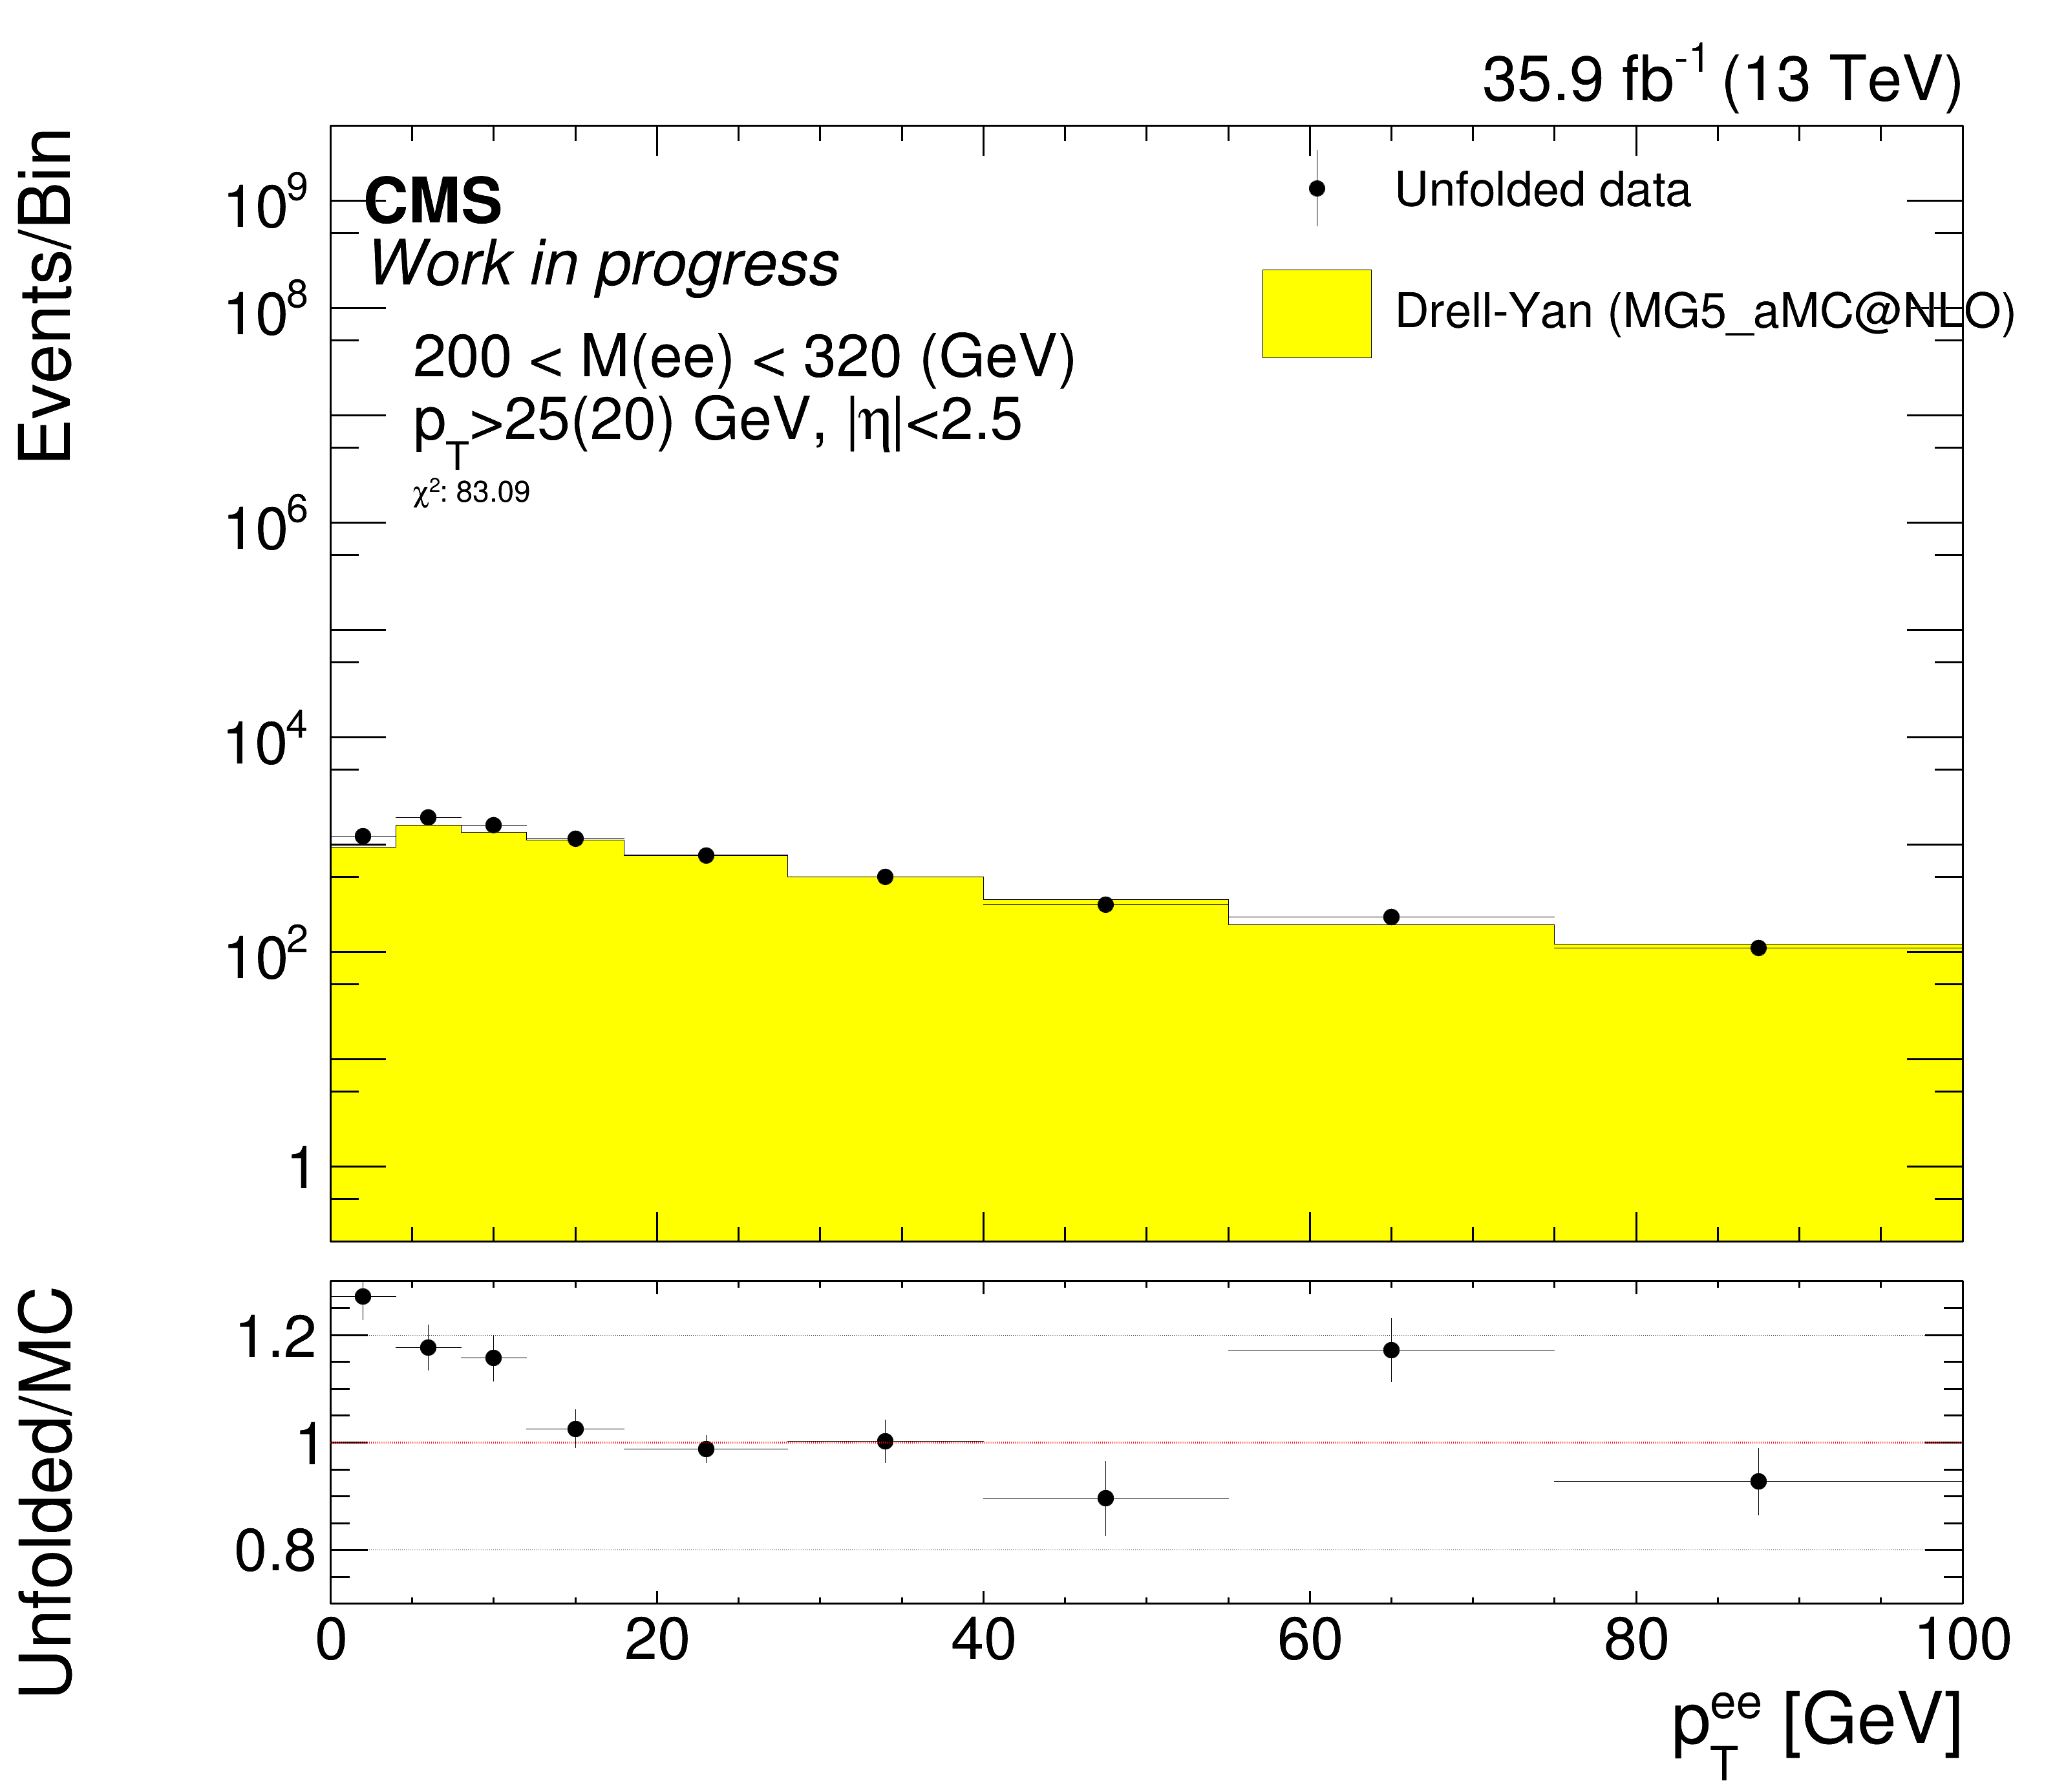

In [16]:
for massBin in range(5):
    detUnfold_muon_2016.drawUnfPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, "", "UnfDiPt_M"+str(massBin), massBin, True)

In [17]:
detUnfold_muon_2016.setMeanValues()

ISRUnfold::setMeanMass()   Save mean of dilepton...
ISRUnfold::setMeanPt()   Save mean of dilepton momentum...


In [18]:
detUnfold_muon_2016.setSysMeanValues()

ISRUnfold::setSysMeanMass()   Save mean of dilepton...
Unfold for AlphaS systematic.
2 systematic variation exist.
AlphaS AlphaSUp 56.91
AlphaS AlphaSUp 74.0499
AlphaS AlphaSUp 91.1872
AlphaS AlphaSUp 117.989
AlphaS AlphaSUp 241.836
AlphaS AlphaSDown 56.9062
AlphaS AlphaSDown 74.0453
AlphaS AlphaSDown 91.1872
AlphaS AlphaSDown 117.993
AlphaS AlphaSDown 241.837
Unfold for ID systematic.
2 systematic variation exist.
ID IdSFUp 56.9147
ID IdSFUp 74.0787
ID IdSFUp 91.1955
ID IdSFUp 118
ID IdSFUp 241.713
ID IdSFDown 56.9044
ID IdSFDown 74.0188
ID IdSFDown 91.1773
ID IdSFDown 117.961
ID IdSFDown 241.988
Unfold for PU systematic.
2 systematic variation exist.
PU PUUp 56.9038
PU PUUp 74.0545
PU PUUp 91.1926
PU PUUp 117.96
PU PUUp 241.903
PU PUDown 56.915
PU PUDown 74.043
PU PUDown 91.1802
PU PUDown 118.002
PU PUDown 241.795
Unfold for Scale systematic.
2 systematic variation exist.
Scale ScaleABUp 56.9209
Scale ScaleABUp 74.0532
Scale ScaleABUp 91.1879
Scale ScaleABUp 118.001
Scale ScaleABUp 2

In [19]:
detUnfold_muon_2016.setSysError()

Systematic: AlphaS 0 mass bin 
mass: 0.00329533 pt: 0.0415633
Systematic: AlphaS 1 mass bin 
mass: 0.00365183 pt: 0.0209756
Systematic: AlphaS 2 mass bin 
mass: 0.000693726 pt: 0.00134253
Systematic: AlphaS 3 mass bin 
mass: 0.0122798 pt: 0.0355031
Systematic: AlphaS 4 mass bin 
mass: 0.0126961 pt: 0.177846
Systematic: ID 0 mass bin 
mass: 0.0051515 pt: 0.0743339
Systematic: ID 1 mass bin 
mass: 0.0301984 pt: 0.059642
Systematic: ID 2 mass bin 
mass: 0.00917943 pt: 0.0250388
Systematic: ID 3 mass bin 
mass: 0.0198701 pt: 0.0510119
Systematic: ID 4 mass bin 
mass: 0.138545 pt: 0.0917124
Systematic: PU 0 mass bin 
mass: 0.00576095 pt: 0.00796077
Systematic: PU 1 mass bin 
mass: 0.00597976 pt: 0.00432798
Systematic: PU 2 mass bin 
mass: 0.00633052 pt: 0.00565254
Systematic: PU 3 mass bin 
mass: 0.0216042 pt: 0.00396071
Systematic: PU 4 mass bin 
mass: 0.0542546 pt: 0.0316643
Systematic: Scale 0 mass bin 
mass: 0.0155762 pt: 0.121783
Systematic: Scale 1 mass bin 
mass: 0.0042683 pt: 0.0217

In [20]:
detUnfold_muon_2016.setTotSysError()

In [21]:
gr_2016_muon_det_unfold =  detUnfold_muon_2016.getPtVsMassTGraph("2016MuonDetUnf")
gr_2016_muon_det_unfold_sys =  detUnfold_muon_2016.getPtVsMassTGraph("2016MuonDetUnf",True,True)

In [22]:
gr_2016_muon_det =  detUnfold_muon_2016.getPtVsMassTGraph("2016MuonDet", False)

20.1 fb^{-1} (13 TeV)


Info in <TCanvas::Print>: png file Run2_detector.png has been created


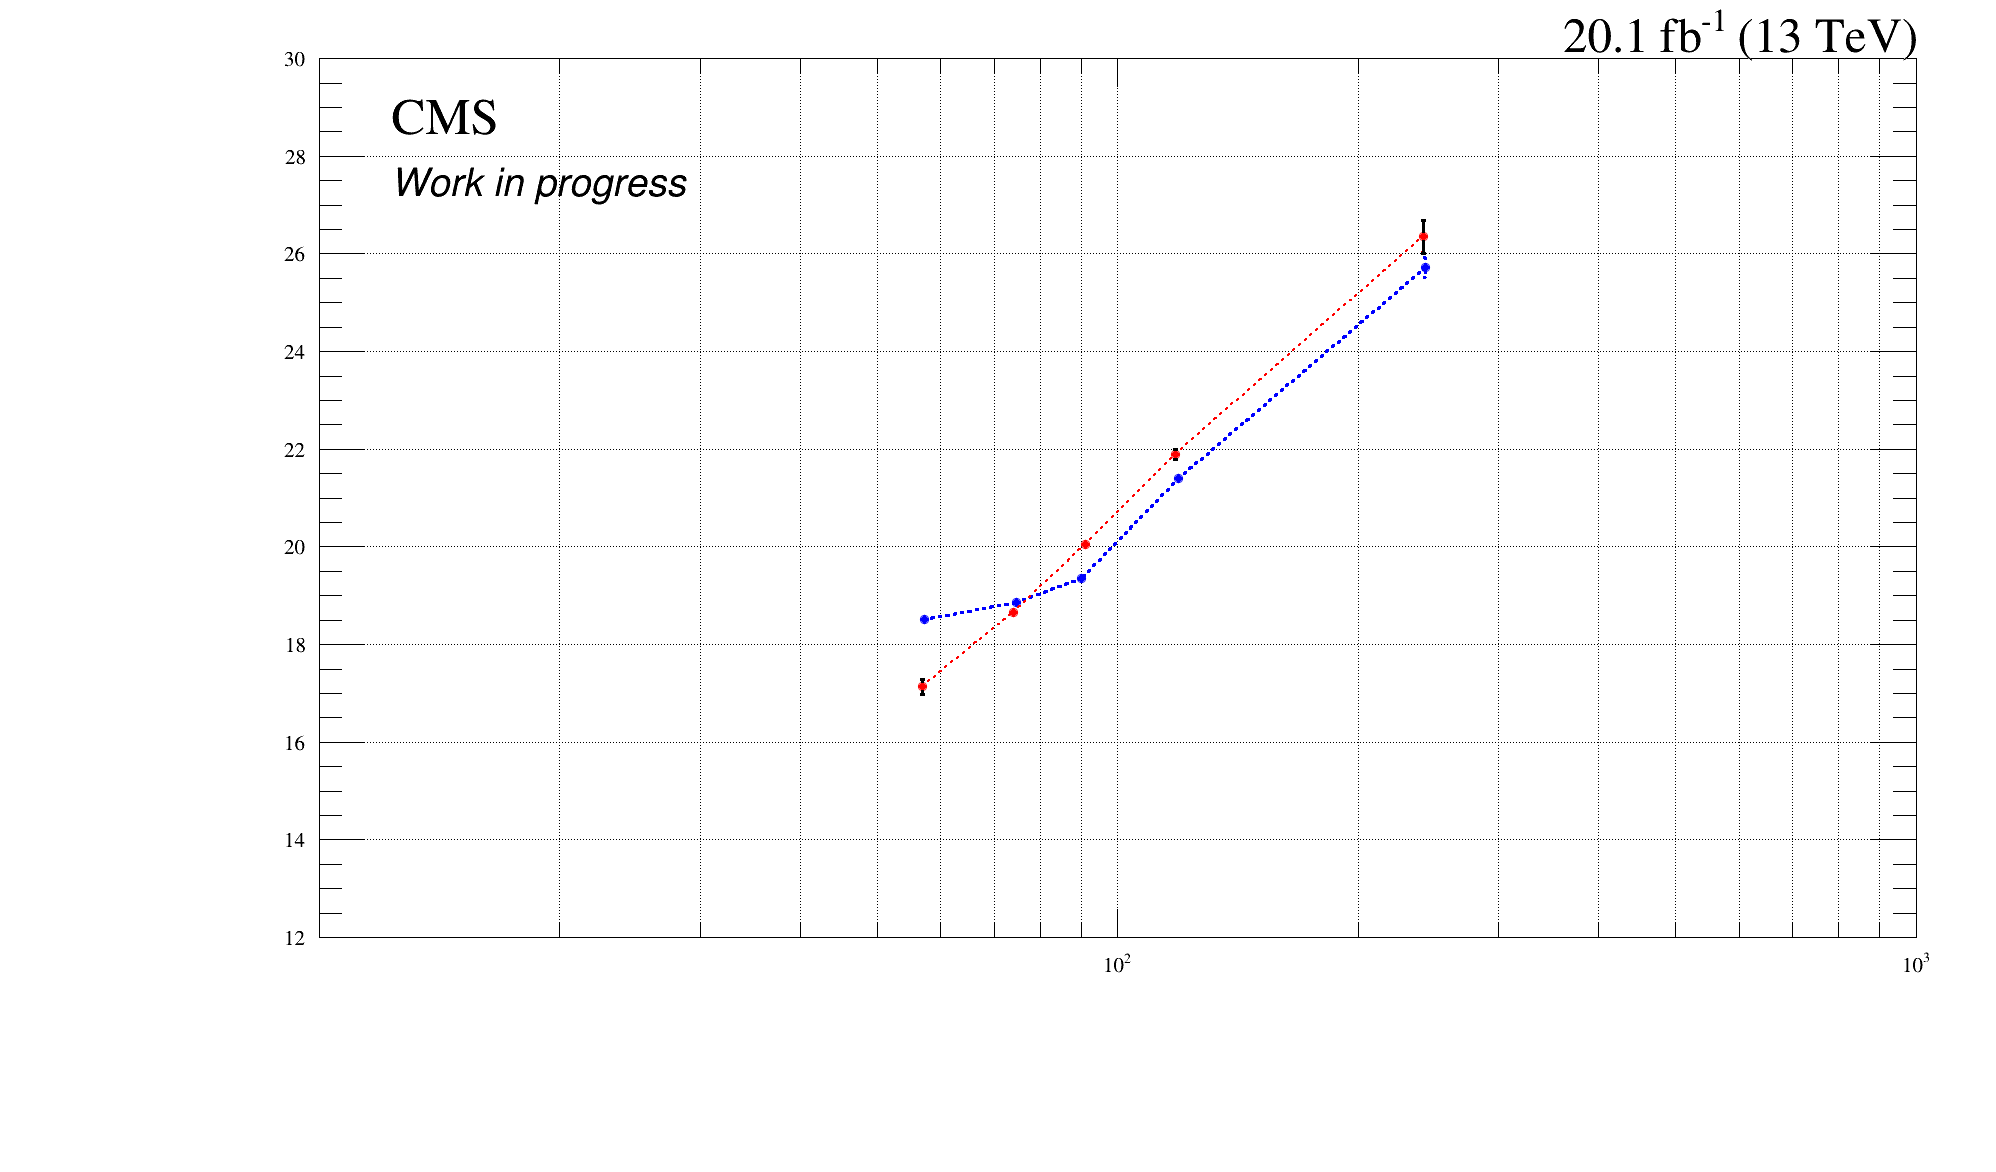

In [23]:
import pyScripts.tdrStyle as tdrStyle
import pyScripts.CMS_lumi as CMS_lumi
import ROOT as rt
markerSize = 1.2

tdrStyle.setTDRStyle()
rt.gStyle.SetOptFit(0)

c_PtVsMass_detector = rt.TCanvas("PtVsMass_detector","PtVsMass_detector", 2000, 1200)
c_PtVsMass_detector.SetGridx()
c_PtVsMass_detector.SetGridy()
c_PtVsMass_detector.SetLogx()
c_PtVsMass_detector.SetBottomMargin(0.2)

gr_2016_muon_det.SetTitle("2016, 2017, 2018 Detector level")
gr_2016_muon_det.Draw("APL")
gr_2016_muon_det.GetYaxis().SetRangeUser(12., 30.)
gr_2016_muon_det.GetXaxis().SetLimits(10., 1000.)
gr_2016_muon_det.SetMarkerStyle(20)
gr_2016_muon_det.SetLineStyle(2)
gr_2016_muon_det.SetMarkerSize(markerSize)
gr_2016_muon_det.SetMarkerColor(rt.kBlue)
gr_2016_muon_det.SetLineColor(rt.kBlue)

gr_2016_muon_det_unfold.Draw("PL SAME")
gr_2016_muon_det_unfold.SetLineWidth(2)
gr_2016_muon_det_unfold.SetMarkerColor(rt.kRed)
gr_2016_muon_det_unfold.SetLineStyle(2)
gr_2016_muon_det_unfold.SetLineColor(rt.kRed)

gr_2016_muon_det_unfold_sys.Draw("E SAME")
gr_2016_muon_det_unfold_sys.SetLineWidth(3)
gr_2016_muon_det_unfold_sys.SetMarkerColor(rt.kBlack)
gr_2016_muon_det_unfold_sys.SetLineColor(rt.kBlack)

CMS_lumi.extraText = "Work in progress"
CMS_lumi.CMS_lumi(c_PtVsMass_detector, 4, 11)
c_PtVsMass_detector.Draw()
c_PtVsMass_detector.SaveAs("Run2_detector.png")